In [34]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [35]:
data = pd.read_csv('info.csv')
print(data.head())
print ('\n Data Types:')
print (data.dtypes)

          Date      Symbol  Series  Open Price   High Price   Low Price  \
0  01-Oct-2018   ICICIBANK      EQ      306.30       315.05      300.55   
1  28-Sep-2018   ICICIBANK      EQ      309.10       311.60      301.80   
2  27-Sep-2018   ICICIBANK      EQ      315.65       316.00      305.30   
3  26-Sep-2018   ICICIBANK      EQ      315.00       315.30      305.10   
4  25-Sep-2018   ICICIBANK      EQ      307.00       313.50      300.05   

    Last Traded Price    Close Price   Total Traded Quantity  \
0               314.20        314.00                21104376   
1               306.00        305.55                26289107   
2               308.30        306.65                24888615   
3               312.90        313.10                23224979   
4               310.95        311.10                30472132   

    Turnover (in Lakhs)  
0              65070.69  
1              80430.36  
2              76647.32  
3              72183.70  
4              93241.88  

 Data T

In [36]:
dateparse = lambda dates: pd.datetime.strptime('%D-%M-%Y',dates)
data = pd.read_csv('info.csv', parse_dates=['Date'], index_col='Date')
print (data.head())

                Symbol  Series  Open Price   High Price   Low Price  \
Date                                                                  
2018-10-01   ICICIBANK      EQ      306.30       315.05      300.55   
2018-09-28   ICICIBANK      EQ      309.10       311.60      301.80   
2018-09-27   ICICIBANK      EQ      315.65       316.00      305.30   
2018-09-26   ICICIBANK      EQ      315.00       315.30      305.10   
2018-09-25   ICICIBANK      EQ      307.00       313.50      300.05   

             Last Traded Price    Close Price   Total Traded Quantity  \
Date                                                                    
2018-10-01               314.20        314.00                21104376   
2018-09-28               306.00        305.55                26289107   
2018-09-27               308.30        306.65                24888615   
2018-09-26               312.90        313.10                23224979   
2018-09-25               310.95        311.10                304

In [37]:
data.index

DatetimeIndex(['2018-10-01', '2018-09-28', '2018-09-27', '2018-09-26',
               '2018-09-25', '2018-09-24', '2018-09-21', '2018-09-19',
               '2018-09-18', '2018-09-17', '2018-09-14', '2018-09-12',
               '2018-09-11', '2018-09-10', '2018-09-07', '2018-09-06',
               '2018-09-05', '2018-09-04', '2018-09-03', '2018-08-31',
               '2018-08-30', '2018-08-29', '2018-08-28', '2018-08-27',
               '2018-08-24', '2018-08-23', '2018-08-21', '2018-08-20',
               '2018-08-17', '2018-08-16', '2018-08-14', '2018-08-13',
               '2018-08-10', '2018-08-09', '2018-08-08', '2018-08-07',
               '2018-08-06', '2018-08-03', '2018-08-02', '2018-08-01',
               '2018-07-31', '2018-07-30', '2018-07-27', '2018-07-26',
               '2018-07-25', '2018-07-24', '2018-07-23', '2018-07-20',
               '2018-07-19', '2018-07-18', '2018-07-17', '2018-07-16',
               '2018-07-13', '2018-07-12', '2018-07-11', '2018-07-10',
      

In [38]:
ts = data['Open Price'] 
ts.head(10)

Date
2018-10-01    306.30
2018-09-28    309.10
2018-09-27    315.65
2018-09-26    315.00
2018-09-25    307.00
2018-09-24    316.80
2018-09-21    323.45
2018-09-19    320.00
2018-09-18    324.25
2018-09-17    327.30
Name: Open Price, dtype: float64

In [39]:
#ts['2018-10-01']
#from datetime import datetime
#ts[datetime(2018,5,9)]
#ts['2018-10-01':'2018-07-02']
#ts[:'2018-05-28']
ts['2018']

Date
2018-10-01    306.30
2018-09-28    309.10
2018-09-27    315.65
2018-09-26    315.00
2018-09-25    307.00
2018-09-24    316.80
2018-09-21    323.45
2018-09-19    320.00
2018-09-18    324.25
2018-09-17    327.30
2018-09-14    327.20
2018-09-12    327.00
2018-09-11    333.70
2018-09-10    331.80
2018-09-07    327.45
2018-09-06    330.00
2018-09-05    327.00
2018-09-04    334.80
2018-09-03    343.60
2018-08-31    343.00
2018-08-30    339.20
2018-08-29    336.35
2018-08-28    342.00
2018-08-27    331.00
2018-08-24    334.40
2018-08-23    336.55
2018-08-21    338.30
2018-08-20    340.00
2018-08-17    336.80
2018-08-16    329.55
               ...  
2018-08-09    320.25
2018-08-08    313.00
2018-08-07    313.95
2018-08-06    306.95
2018-08-03    300.00
2018-08-02    295.00
2018-08-01    302.60
2018-07-31    304.30
2018-07-30    300.00
2018-07-27    284.90
2018-07-26    275.00
2018-07-25    273.00
2018-07-24    273.65
2018-07-23    265.35
2018-07-20    261.80
2018-07-19    263.95
2018-07-

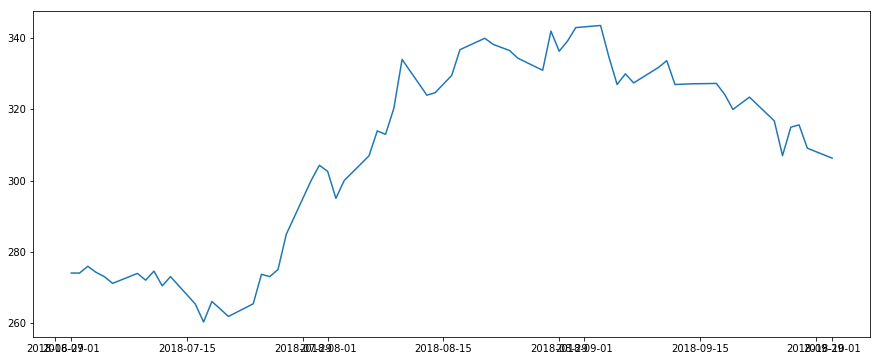

In [40]:
plt.plot(ts)

In [41]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean=timeseries.rolling(12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd=timeseries.rolling(12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

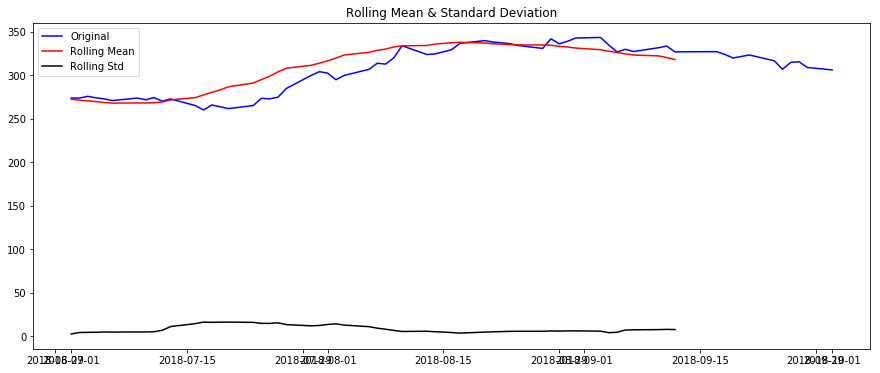

Results of Dickey-Fuller Test:
Test Statistic                 -0.361488
p-value                         0.916333
#Lags Used                      0.000000
Number of Observations Used    62.000000
Critical Value (1%)            -3.540523
Critical Value (5%)            -2.909427
Critical Value (10%)           -2.592314
dtype: float64


In [42]:
test_stationarity(ts)

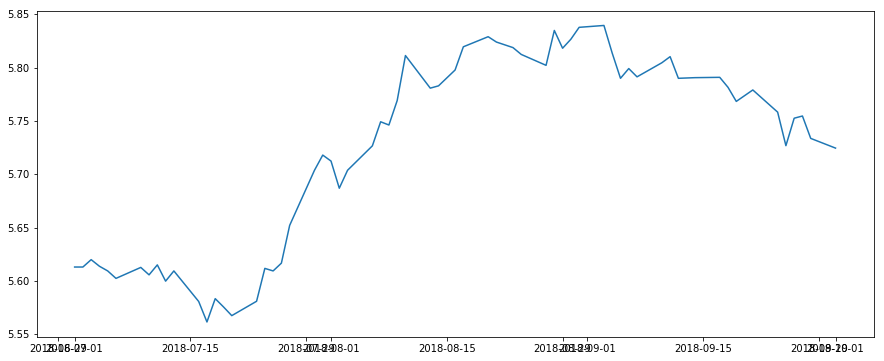

In [43]:
ts_log = np.log(ts)
plt.plot(ts_log)

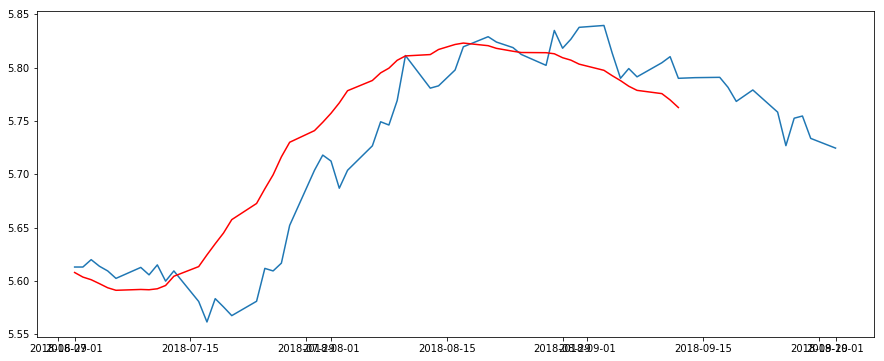

In [44]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [45]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2018-10-01        NaN
2018-09-28        NaN
2018-09-27        NaN
2018-09-26        NaN
2018-09-25        NaN
2018-09-24        NaN
2018-09-21        NaN
2018-09-19        NaN
2018-09-18        NaN
2018-09-17        NaN
2018-09-14        NaN
2018-09-12    0.02739
Name: Open Price, dtype: float64

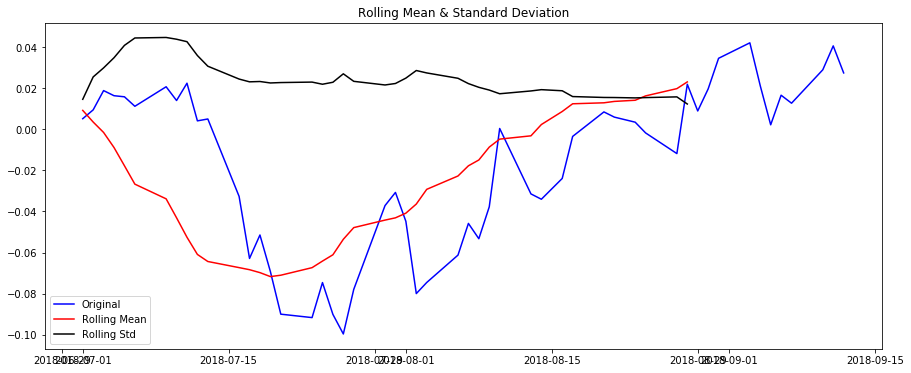

Results of Dickey-Fuller Test:
Test Statistic                 -1.702344
p-value                         0.429905
#Lags Used                      0.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


In [46]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

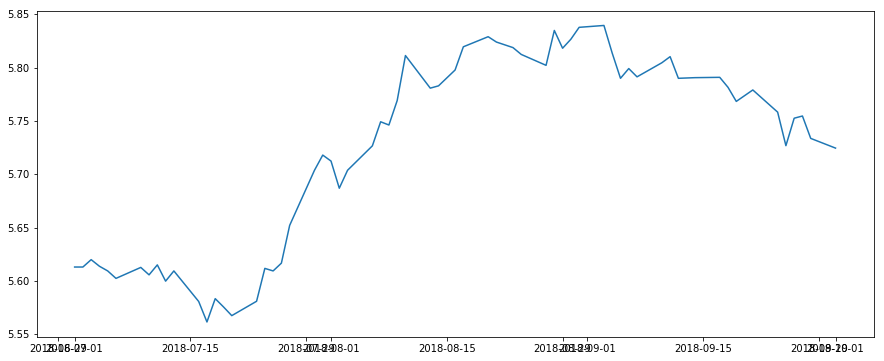

In [47]:
#expwighted_avg =pd.ewma(ts_log, halflife=12)
#expwighted_avg =  pd.ewma(ts_log,span=12,freq="D")
plt.plot(ts_log)
#plt.plot(expwighted_avg, color='red')

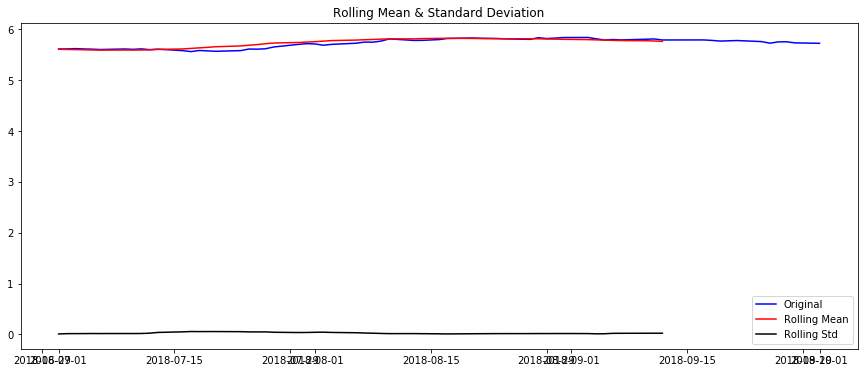

Results of Dickey-Fuller Test:
Test Statistic                 -0.335546
p-value                         0.920317
#Lags Used                      0.000000
Number of Observations Used    62.000000
Critical Value (1%)            -3.540523
Critical Value (5%)            -2.909427
Critical Value (10%)           -2.592314
dtype: float64


In [48]:
test_stationarity(ts_log)

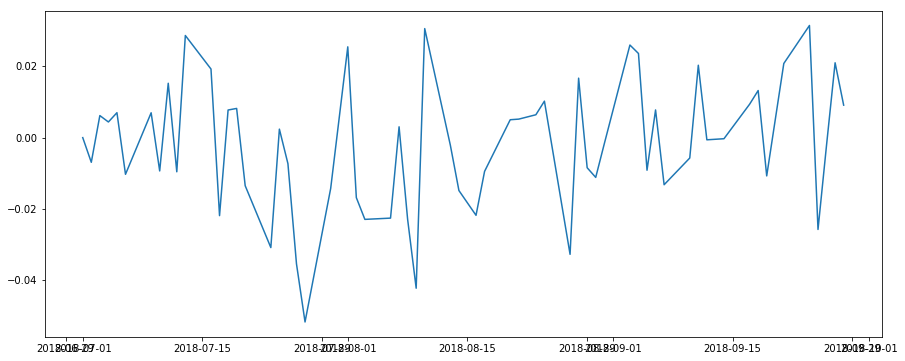

In [49]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

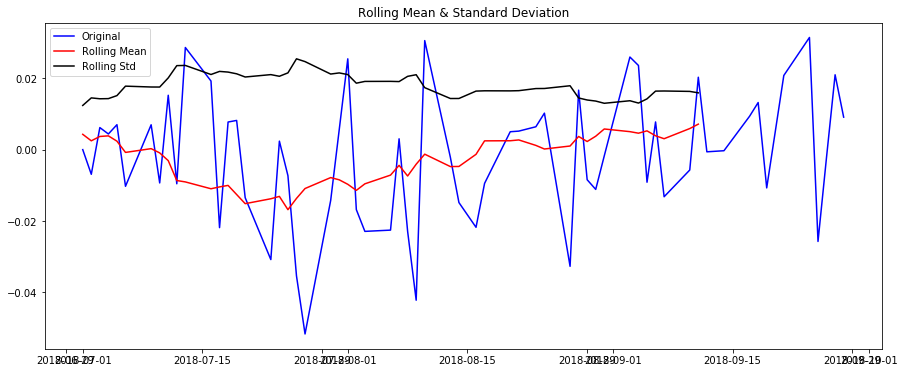

Results of Dickey-Fuller Test:
Test Statistic                -7.067114e+00
p-value                        5.047092e-10
#Lags Used                     0.000000e+00
Number of Observations Used    6.100000e+01
Critical Value (1%)           -3.542413e+00
Critical Value (5%)           -2.910236e+00
Critical Value (10%)          -2.592745e+00
dtype: float64


In [50]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

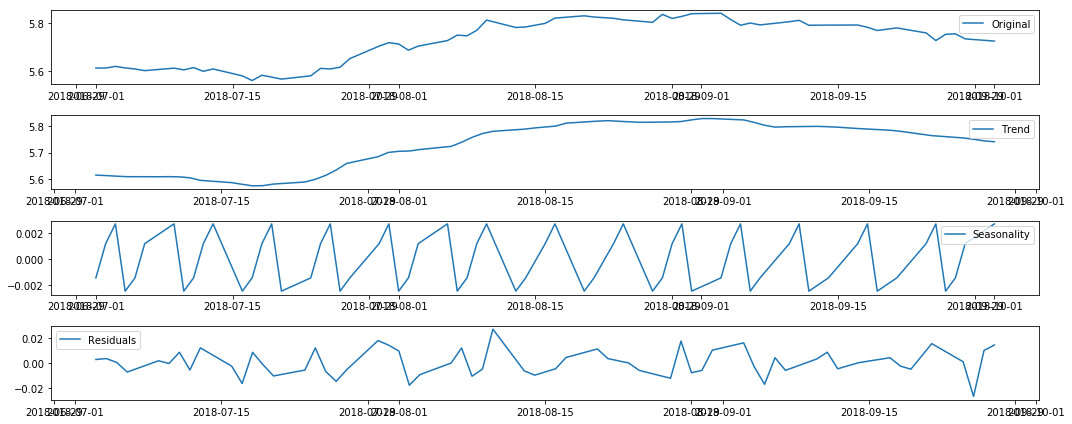

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=4)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

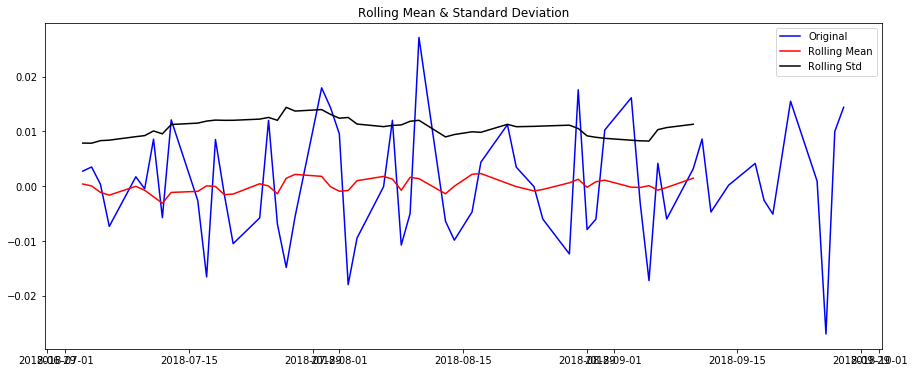

Results of Dickey-Fuller Test:
Test Statistic                -6.777090e+00
p-value                        2.554427e-09
#Lags Used                     2.000000e+00
Number of Observations Used    5.600000e+01
Critical Value (1%)           -3.552928e+00
Critical Value (5%)           -2.914731e+00
Critical Value (10%)          -2.595137e+00
dtype: float64


In [52]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [53]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [54]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

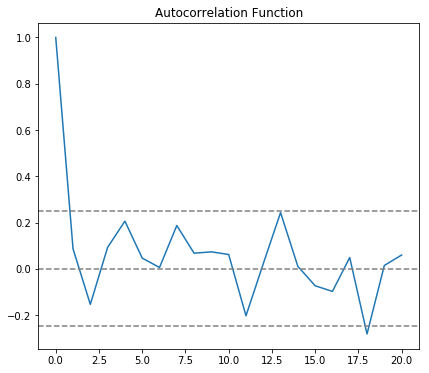

In [55]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

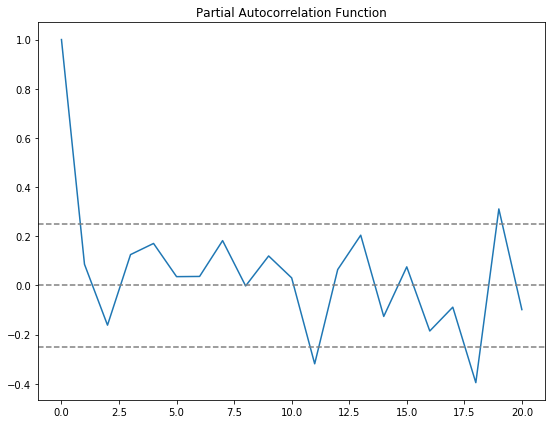

In [56]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [57]:
from statsmodels.tsa.arima_model import ARIMA

c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Text(0.5, 1.0, 'RSS: 0.0197')

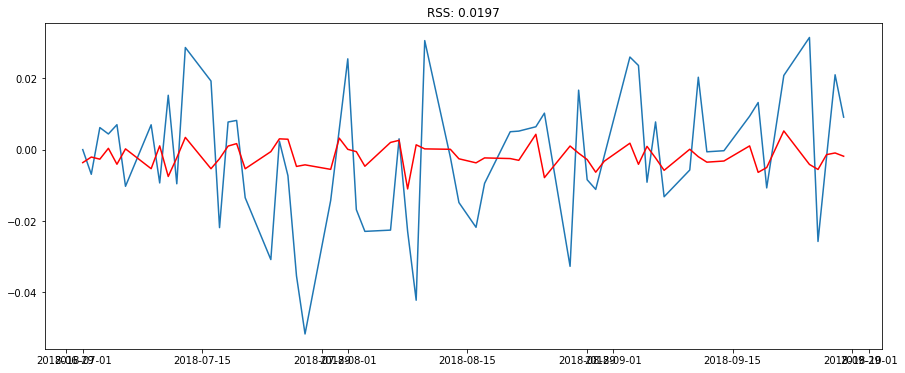

In [58]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Text(0.5, 1.0, 'RSS: 0.0197')

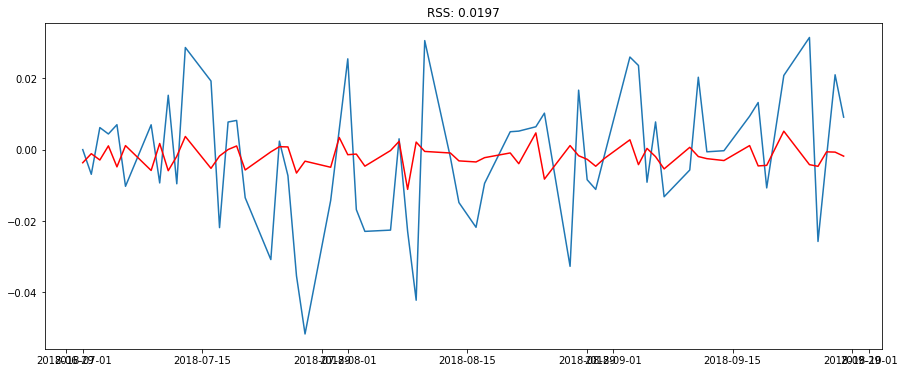

In [59]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Text(0.5, 1.0, 'RSS: 0.0197')

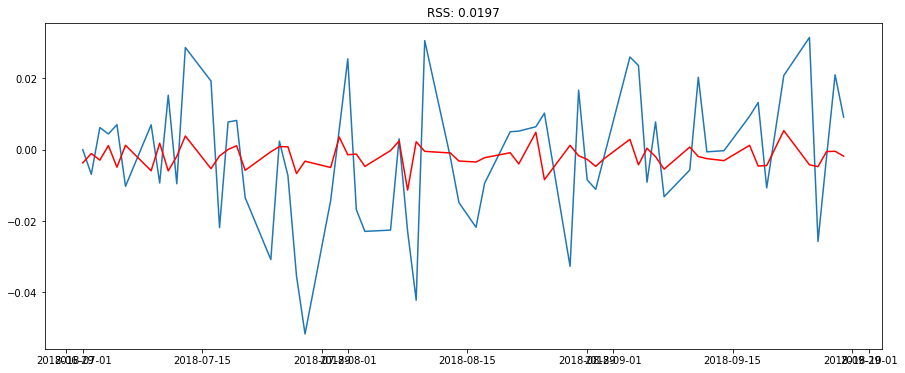

In [60]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_ARIMA = model.fit(disp=-1,method ='css')  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [61]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Date
2018-09-28   -0.001823
2018-09-27   -0.000457
2018-09-26   -0.000543
2018-09-25   -0.004758
2018-09-24   -0.004250
dtype: float64


In [62]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Date
2018-09-28   -0.001823
2018-09-27   -0.002280
2018-09-26   -0.002823
2018-09-25   -0.007582
2018-09-24   -0.011831
dtype: float64


In [63]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
#print(ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2018-07-01    5.610812
2018-07-02    5.614530
2018-07-03    5.615629
2018-07-04    5.618570
2018-07-05    5.617432
dtype: float64

Text(0.5, 1.0, 'RMSE: 26.4460')

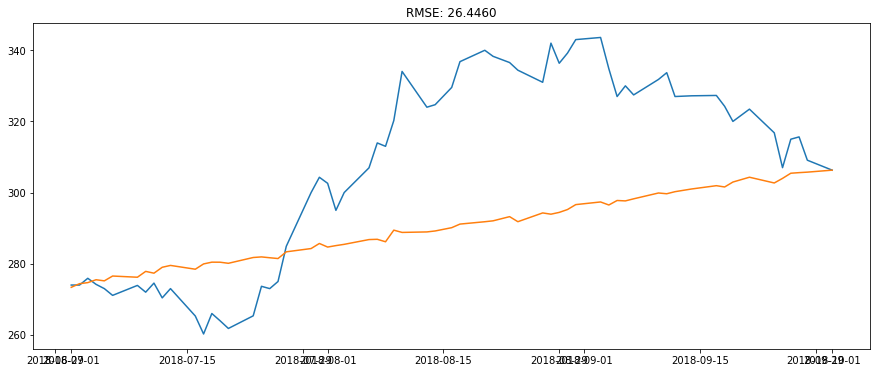

In [64]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [65]:
import plotly.plotly as py 
import plotly.graph_objs as go
#import plotly.figure_factory as FF
from plotly.offline import  init_notebook_mode,plot
df = pd.read_csv('info.csv')

df1 = pd.read_csv('info2.csv')




In [66]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2018-07-01    5.610812
2018-07-02    5.614530
2018-07-03    5.615629
2018-07-04    5.618570
2018-07-05    5.617432
dtype: float64

In [67]:
df1.Open[0]=predictions_ARIMA[0]
df1.Open[1]=predictions_ARIMA[1]
df1.Open[2]=predictions_ARIMA[2]
df1.Open[3]=predictions_ARIMA[3]
df1.Open[4]=predictions_ARIMA[4]
df1.Open[5]=predictions_ARIMA[5]
df1.Open[6]=predictions_ARIMA[6]
df1.Open[7]=predictions_ARIMA[7]
df1.Open[8]=predictions_ARIMA[8]
df1.Open[9]=predictions_ARIMA[9]
df1.Open[10]=predictions_ARIMA[10]

c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\users\pm bhatiya\appdata\local\programs\pyt

In [68]:
print(df1['Open'])


0     273.366100
1     274.384481
2     274.686062
3     275.495119
4     275.181931
5     276.536973
6     276.200455
7     277.843839
8     277.340223
9     278.998886
10    279.520379
Name: Open, dtype: float64


In [69]:
trace = go.Scatter(
                  x = df['Date'], y = df['Open Price'],
                  name='Share Prices (in Rupees)'
)
trace2 = go.Scatter(
                  x = df1['Date'], y = df1['Open'],
                  name='Forcasting Share Prices (in Rupees)'
)
layout = go.Layout(
                  title='Icici Bank Share Prices over time (2018)',
                  plot_bgcolor='rgb(230, 230,230)', 
                  showlegend=True
                  )
fig = go.Figure(data=[trace,trace2], layout=layout)

plot(fig, filename='Icicforcasting.html')

'file://C:\\Users\\PM BHATIYA\\Pattern project\\Icici\\Icicforcasting.html'